# Importing Modules

In [ ]:
#importing necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
pd.set_option("display.max_colwidth", 200)


In [ ]:
%matplotlib notebook

# Reading Cleaned Data

In [ ]:
#reading the csv file
df=pd.read_csv('cleaned_news.csv')

In [ ]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    200 non-null    int64 
 1   title         200 non-null    object
 2   content       200 non-null    object
 3   tidy_content  200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [ ]:
#Top 5 rows of the dataframe
df.head()

,Unnamed: 0,title,content,tidy_content
0,0,"Alton Sterling’s son: ’Everyone needs to protest the right way, with peace’","The son of a Louisiana man whose father was shot and killed at range by Baton Rouge police asked protesters for “peace” and “no violence, none whatsoever”. Cameron Sterling, the son of Alton ...",louisiana whose father shot kill rang baton roug polic ask protest peac violenc none whatsoev cameron sterl alton sterl whose death hand polic caught video spoke father protest alton sterl kill ba...
1,1,Shakespeare’s first four folios sell at auction for almost £2.5m,"Copies of William Shakespeare’s first four books, dubbed the “Holy Grail of publishing” have sold for almost £2. 5m at auction. Christie’s said they were sold as separate lots on Wednesday but wer...",copi william shakespear first four book dub holi grail publish sold almost auction christi said sold separ lot wednesday bought anonym privat american collector sale london includ bard first folio...
2,2,My grandmother’s death saved me from a life of debt,"Debt: $20, 000, Source: College, credit cards, Estimated time till debt free: Unclear, From a purely financial standpoint, my grandmother’s death is probably the best thing that has happened to me...",debt sourc colleg credit card estim time till debt free unclear from pure financi standpoint grandmoth death probabl best thing happen adult life grandmoth came oversea live mother high school rav...
3,3,I feared my life lacked meaning. Cancer pushed me to find some,"It was late. I was drunk, nearing my 35th birthday this past May, alone in a dank college dorm room, attending my grad school reunion. The journal entry I wrote that night was just one line: “I’...",late drunk near birthday past alon dank colleg dorm room attend grad school reunion journal entri wrote night line want reunion charad noth life actual suggest track ambiti public servic aspir wor...
4,4,"Texas man serving life sentence innocent of double murder, judge says","A central Texas man serving a life sentence for a double murder in 1992 is innocent, as are three codefendants no longer in prison, a state judge has found. Retired district judge George Allen rul...",central texa serv life sentenc doubl murder innoc three codefend longer prison state judg found retir district judg georg allen rule friday richard bryan kussmaul free three codefend receiv senten...


In [ ]:
#Splitting the text by spaces or in simple words tokenizing.
df['tokenized_content'] = df['tidy_content'].apply(lambda x: x.split())

In [ ]:
#checking the first cleaned tokenised text.
print((df['tokenized_content'].values)[0])

['louisiana', 'whose', 'father', 'shot', 'kill', 'rang', 'baton', 'roug', 'polic', 'ask', 'protest', 'peac', 'violenc', 'none', 'whatsoev', 'cameron', 'sterl', 'alton', 'sterl', 'whose', 'death', 'hand', 'polic', 'caught', 'video', 'spoke', 'father', 'protest', 'alton', 'sterl', 'kill', 'baton', 'roug', 'polic', 'juli', 'conveni', 'store', 'said', 'sell', 'baton', 'roug', 'polic', 'said', 'statement', 'polic', 'call', 'conveni', 'store', 'sterl', 'allegedli', 'threaten', 'anoth', 'patron', 'press', 'confer', 'wednesday', 'cameron', 'first', 'sinc', 'broke', 'sob', 'nation', 'broadcast', 'press', 'confer', 'mother', 'follow', 'father', 'death', 'came', 'talk', 'everyon', 'death', 'father', 'feel', 'peopl', 'gener', 'said', 'cameron', 'whose', 'distinctli', 'young', 'voic', 'calm', 'compos', 'front', 'scrum', 'report', 'tripl', 'conveni', 'store', 'peopl', 'gener', 'matter', 'race', 'come', 'togeth', 'unit', 'famili', 'argument', 'violenc', 'crime', 'said', 'cameron', 'protest', 'want', 

# LSA Implimentation

LSA is a vector-based method that assumes that words that share the same meaning also occur in the same texts (Landauer and Dumais, 1997:215). This is done by first simplifying the document-term matrix using Singular Value Decomposition (SVD), before finding close related terms and documents. This is done by using the principals of vector-based cosine similarities.

In [ ]:
#Using scikit learn tfidf vectorizer to get doc term TF-IDF score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#bow_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000, stop_words='english')
bow_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df['tidy_content'])
bow.shape

(200, 5272)

In [ ]:
#total number of words considered in the corpus.
len(bow_vectorizer.get_feature_names())

5272

In [ ]:
#creating doc-term matrix for our documents
term_doc_mat=bow_vectorizer.transform(df['tidy_content'].values)

# SVD (singular-value decomposition)
In linear algebra, the singular-value decomposition (SVD) is a factorization of a real or complex matrix. It is the generalization of the eigendecomposition of a positive semidefinite normal matrix (for example, a symmetric matrix with positive eigenvalues) to any m × n matrix via an extension of the polar decomposition. It has many useful applications in signal processing and statistics. 

### Truncated SVD will assign different weight to all the word features for different topics. I am considering 5 topics for my convinience.

In [ ]:
#Using sklearn's SVD package
no_of_topic=5
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=no_of_topic,n_iter=100)

In [ ]:
#fitting the term-doc matrix into the model
lsa.fit(term_doc_mat)

TruncatedSVD(n_components=5, n_iter=100)

In [ ]:
#saving all the corpus words in the variable terms for further use.
terms = bow_vectorizer.get_feature_names()

In [ ]:
#weights for all the words for different-differnt topics(in our case 5)
print(lsa.components_)

[[ 2.00494971e-03  7.74474538e-03  2.39032073e-03 ...  2.35228451e-02
   3.22853445e-03  6.32328888e-03]
 [ 3.12291412e-04 -4.33440842e-03 -4.41075012e-05 ... -1.06936603e-02
  -5.83457891e-03 -7.92871861e-03]
 [ 3.28937385e-03 -1.21335369e-03 -4.54738278e-03 ...  1.41314767e-01
  -1.27639588e-02  8.62978619e-03]
 [-1.39876517e-03 -1.39982743e-03 -1.43858307e-03 ...  2.37952417e-01
   3.36540704e-03  1.30246921e-03]
 [-1.87928857e-04 -6.05687298e-03  5.73597934e-03 ... -5.97168916e-02
   1.56600395e-02  1.29200919e-02]]


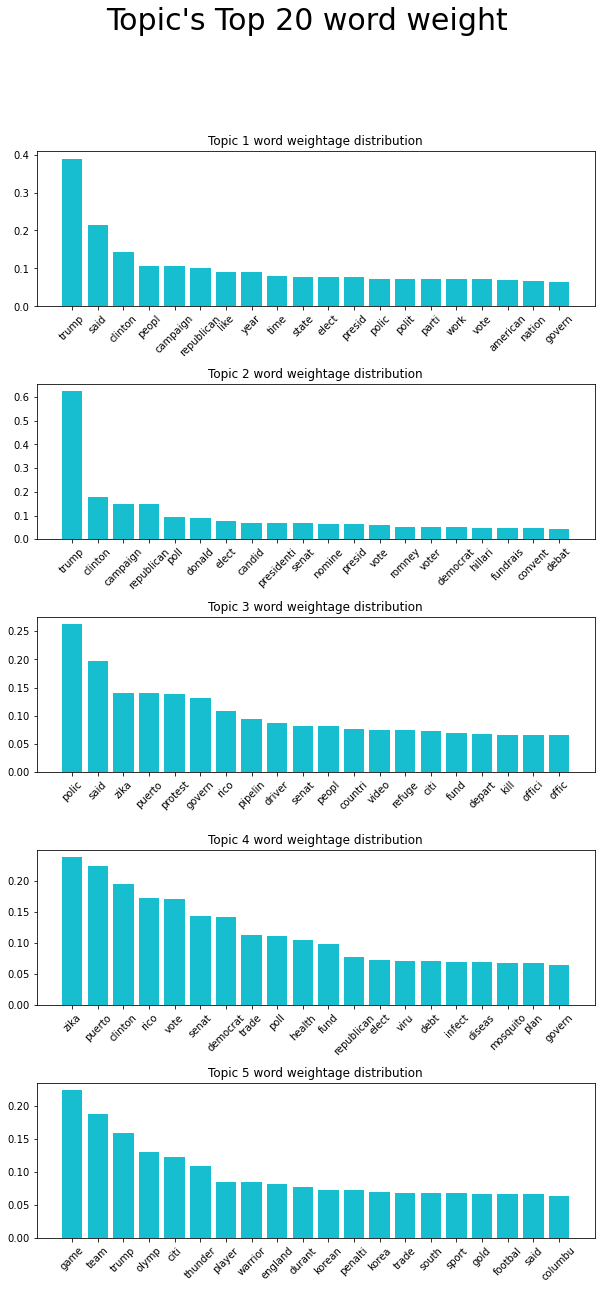

In [ ]:
'''Considering the top 20 words for all the 5 topic we created using the truncated SVD.
   Displaing the top 20 words of each topic with weights.'''
%matplotlib inline
topic_dic={}
f, axarr = plt.subplots(no_of_topic,1,figsize=(10, 20))
f.suptitle('Topic\'s Top 20 word weight',fontsize= 30)
plt.subplots_adjust(hspace = 0.5)
for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:20]
    topic_dic[i]=sortedterms
    #print("Concept %d:" % i)
    word=[]
    weight=[]
    fig=[]
    
    #
    for term in sortedterms:
        word.append(term[0])
        weight.append(term[1])
        #print(term,end=',')   
        axarr[i].set_title('Topic '+str(i+1)+ ' word weightage distribution')
        axarr[i].bar(word, weight)
        axarr[i].tick_params(axis='x', labelrotation=45)
    
    print(" ")
#plt.xticks(rotation=90)
plt.show()

### Classifing the Documents

In [ ]:
'''When passed a document it will calculate it's score for all the five topics and return a list of scores.'''
def score(doc):
    topic_score=[]
    for i in topic_dic.keys():
        score=0
        for each in topic_dic[i]:
            if(each[0] in doc):
                n=doc.count(each[0])
                score+=n*each[1]
        topic_score.append(score)
    return(topic_score)

In [ ]:
#passing all the documents to classify the topics to the documents.
scores=df['tidy_content'].apply(score)

In [ ]:
scores[:10]

0                                       [2.4490994866419222, 0, 5.761899575824556, 0, 0.3985467870636208]
1                                      [0.8608253820842989, 0, 0.5920048271734065, 0, 0.1992733935318104]
2                                                       [1.1447617890702246, 0, 0, 0.9867866381623511, 0]
3                                     [1.1418769224744703, 0, 0.15892499589284825, 0.0695033112020203, 0]
4                    [1.7116310724205825, 0.06457694831521087, 0.8714048993839857, 0, 0.4072451736852127]
5     [4.093720375414312, 3.7974798235899057, 0.7787633727391025, 0.9489251823943496, 1.1613950104838342]
6    [4.944082276405187, 0.04625383856337582, 5.643709314199891, 0.19653969646030223, 1.0552816392697235]
7                                     [1.6468026278703751, 0, 0.8786406287842353, 0, 0.32458985071186053]
8     [6.1497122955370545, 0.06457694831521087, 5.391682939885204, 0.9574362128622291, 0.999520356529058]
9     [9.752113622334688, 14.047644161275503, 

In [ ]:
'''topic_num will take a list as input and will return the index with the maximum value in that list.
   This will help giving the document a cluster number'''
def topic_num(score):
    score=np.argmax(score)
    return score

In [ ]:
#geting the cluster number for all the document
classified=scores.apply(topic_num)

In [ ]:
#checking how many document alloted to all the clusters in our data.
classified.value_counts()

0    103
1     37
4     30
2     24
3      6
Name: tidy_content, dtype: int64

Text(0.5, 1.0, 'Number of Documents to each Topic from LSA')

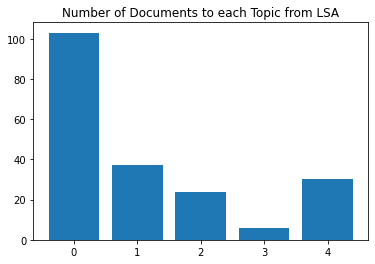

In [ ]:
#plot to show the number of documents to each topic
plt.bar(classified.value_counts().index, classified.value_counts().values)
plt.title('Number of Documents to each Topic from LSA')

# K-means clustering 

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. 

In [ ]:
#Using the kmeans clustering from the sklearn package.
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=5)

Kmean.fit(term_doc_mat)

KMeans(n_clusters=5)

In [ ]:
#Storing the prediction from the clustering algorithm
prediction=Kmean.predict(term_doc_mat)

In [ ]:
#checking the count for each cluster to compair with the LSA cluster
unique, counts = np.unique(prediction, return_counts=True)

unique, counts

(array([0, 1, 2, 3, 4]), array([41, 85, 23, 41, 10], dtype=int64))

Text(0.5, 1.0, 'Number of Documents to each Topic from K-means Clustering')

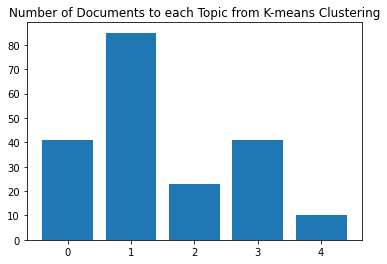

In [ ]:
plt.bar(unique, counts)
plt.title('Number of Documents to each Topic from K-means Clustering')

# Comparing LSA assigned topic and K-means assigned topic

In [ ]:
doc_doc=pd.read_csv('doc_doc.csv',index_col=0)

In [ ]:
doc_doc.head()

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10,...,Doc191,Doc192,Doc193,Doc194,Doc195,Doc196,Doc197,Doc198,Doc199,Doc200
Doc1,1.000000,0.038307,0.026387,0.029036,0.045337,0.079822,0.076656,0.016005,0.058785,0.025527,...,0.031133,0.042346,0.033596,0.027002,0.006615,0.024549,0.045915,0.017947,0.034031,0.028855
Doc2,0.038307,1.000000,0.027302,0.058086,0.014191,0.043362,0.037146,0.042356,0.028284,0.027415,...,0.008971,0.037144,0.048185,0.021970,0.012289,0.025644,0.028779,0.017494,0.021585,0.050356
Doc3,0.026387,0.027302,1.000000,0.110198,0.021527,0.066781,0.076807,0.040102,0.031625,0.022795,...,0.028746,0.047071,0.034295,0.033965,0.015576,0.041274,0.036669,0.012763,0.018148,0.051134
Doc4,0.029036,0.058086,0.110198,1.000000,0.047526,0.103563,0.107751,0.065321,0.043363,0.032527,...,0.051650,0.085700,0.062714,0.051662,0.032160,0.055039,0.075397,0.028234,0.044562,0.057774
Doc5,0.045337,0.014191,0.021527,0.047526,1.000000,0.038947,0.056264,0.029084,0.101424,0.028680,...,0.053399,0.062407,0.034927,0.042660,0.025594,0.016350,0.070943,0.016556,0.029067,0.042368


In [ ]:
#for i in range(1,201):
#    for j in range(i+1,201):
#        if(doc_doc.loc['Doc'+str(i)]['Doc'+str(j)]>0.2):
#            if(classified[i-1]==classified[j-1] and prediction[i-1]==prediction[j-1]):
#                print('Doc',i,'and Doc',j,'score is',doc_doc.loc['Doc'+str(i)]['Doc'+str(j)])

In [ ]:
'''Now we will check the similarity of K-means and LSA.
   same variable counts the document pair that is having same topic for both k-means and LSA'''
same=0
total=0
for i in range(1,201):
    for j in range(i+1,201):
        if(classified[i-1]==classified[j-1] and prediction[i-1]==prediction[j-1]):
            same+=1
        total+=1

In [ ]:
print('total number of Document pair are ', total)
print('total number of Document pair classified same by both algorithm are ', same)

total number of Document pair are  19900
total number of Document pair classified same by both algorithm are  2893


### Out of 19900 combinations of documents 2893 (may vary with different executions) combinations of documents were given same topic by both LSA and K-means. That makes a total of 15%

In [ ]:
#checking for all the document combination that has similarity more than 60%
for i in range(1,201):
    for j in range(i+1,201):
        if(doc_doc.loc['Doc'+str(i)]['Doc'+str(j)]>0.6):
            if(classified[i-1]==classified[j-1] and prediction[i-1]==prediction[j-1]):
                print('Doc',i,'and Doc',j,'score is',doc_doc.loc['Doc'+str(i)]['Doc'+str(j)])

Doc 20 and Doc 191 score is 0.6602014968842258


Turns out there is only one document combination that has more than 60% cosine similarity and are given same topics by both algorithm.

In [ ]:
#checking document 20 and document 191 because it have max cosine similarity of 0.6602.
df.loc[19]['content'],df.loc[190]['content']

('The Golden State Warriors came from behind to topple the Oklahoma City Thunder   in Monday’s Game 7 of the Western Conference finals, completing a rally from a   series deficit to seal a place in the NBA finals for the second year in a row. Stephen Curry scored a   36 points to spark the Warriors, who trailed by as many as 13 during the first half but used a   run in the third quarter to open an   lead entering the fourth. His Golden State   Klay Thompson added 21 points and six   to follow up his   performance in Game 6 on Saturday, when the Warriors needed a furious rally to force Monday’s    finale. Golden State become the 10th team in NBA history to rally from a     deficit in   postseason series and win it. “This may be the greatest team in the history of the NBA,” Thunder coach Billy Donovan said afterward. “They do things like make big shots and do some of those things. We were right there every step of the way with them, and this was a   team and world champions. We’ve got to

## Turns out that yes, both the document belongs to the same topic.

In [ ]:
#checking for all the document combination that LSA has assigned same topic and their validity in K-Means
same=0
total=0
for i in range(1,201):
    for j in range(i+1,201):
        if(classified[i-1]==classified[j-1]):
            if(prediction[i-1]==prediction[j-1]):
                same+=1
            total+=1

print('total number of Document pair classified same by LSA are ', total)
print('total number of Document pair classified same by K-means given are classified same by LSA are ', same)

total number of Document pair classified same by LSA are  6645
total number of Document pair classified same by K-means given are classified same by LSA are  2893


### There are total 6645(May vary with execution) Document pair where LSA has assigned same topic, out of which only 2893(may vary with execution) are assigned to same topic by K-Means clustering.